In [8]:
using Pkg
Pkg.activate(".")
using Luxor
using MathTeXEngine
using LaTeXStrings

  Activating project at `~/MEGA/EMAp/Mathematical-Short-Notes/Fields/Category-Theory/notebooks`


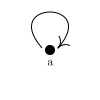

In [220]:
function quiverarrow(shaftendpoint, endpoint, shaftangle)
    @layer begin
        setlinecap("round")
        translate(endpoint)
        rotate(shaftangle-π)
        # setline(1)
        
        c1  = Point(0,-10)
        p1 = c1 + 10Point(cos(π/10), sin(π/10))
        p2 = O
        
        arc2r(c1,p1,p2,:stroke)

        c2  = Point(0,10)
        p3 = c2 + 10Point(cos(-π/10), sin(-π/10))
        arc2r(c2,p2,p3,:stroke)
    end
end


d = Drawing(100,100,:svg)
origin()
circle(O, 5,:fill)
fontsize(12)
label(L"a",:S, offset=10)
arrow(Point(-8,-2),Point(-50,-50), Point(50,-50),Point(8,-2),linewidth=1,
    arrowheadlength = 0,
    arrowheadfunction = quiverarrow)
finish()
d